In [1]:
using VMLS
using LinearAlgebra

## Chapter 10
# Matrix multiplication
### 10.1 Matrix-matrix multiplication
In Julia the product of matrices `A` and `B` is obtained with `A*B`. We calculate the matrix product on page [177](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section.10.1) of VMLS. 

In [2]:
A = [-1.5 3 2; 1 -1 0]

2×3 Matrix{Float64}:
 -1.5   3.0  2.0
  1.0  -1.0  0.0

In [3]:
B = [-1 -1; 0 -2; 1 0]

3×2 Matrix{Int64}:
 -1  -1
  0  -2
  1   0

In [4]:
C = A*B

2×2 Matrix{Float64}:
  3.5  -4.5
 -1.0   1.0

**Gram matrix.** The Gram matrix of a matrix $A$ is the matrix $G = A^TA$. It is a symmetric matrix and the $i$, $j$ element $G_{ij}$ is the inner product of columns $i$ and $j$ of $A$.

In [5]:
 A = randn(10,3);
 G = A'*A

3×3 Matrix{Float64}:
  8.16261  2.07027   -4.46503
  2.07027  8.7209     0.566318
 -4.46503  0.566318   9.9152

In [6]:
# Gii is norm of column i, squared
G[2,2]

8.720901253955297

In [7]:
norm(A[:,2])^2

8.720901253955297

In [8]:
# Gij is inner product of columns i and j
G[1,3],A[:,1]'*A[:,3]

(-4.465034441247831, -4.465034441247831)

**Complexity of matrix triple product.** Let’s check the associative property, which
states that $(AB)C = A(BC)$ for any $m×n$ matrix $A$, any $n×p$ matrix $B$, and any
$p × q$ matrix $B$. At the same time we will see that the left-hand and right-hand
sides take very different amounts of time to compute.

In [9]:
m = 2000; n = 50; q = 2000; p = 2000;
A = randn(m,n); B = randn(n,p); C = randn(p,q);
@time (A*B)*C
@time (A*B)*C
@time A*(B*C)
@time A*(B*C)
@time D = A*B*C; # evaluated as (A*B)*C or as A*(B*C)?

LHS = (A*B)*C
RHS = A*(B*C)
norm(LHS-RHS)

  0.152037 seconds (26.26 k allocations: 62.851 MiB, 5.88% gc time, 4.52% compilation time)
  0.148874 seconds (4 allocations: 61.035 MiB, 8.07% gc time)
  0.064387 seconds (4 allocations: 31.281 MiB, 78.29% gc time)
  0.013695 seconds (4 allocations: 31.281 MiB)
  0.021670 seconds (4.17 k allocations: 31.553 MiB, 8.32% gc time, 26.55% compilation time)


4.1836137034352076e-10

We see that evaluating `(A*B)*C` takes around 10 times as much time as evaluating `A*(B*C)`, which is predicted from the complexities. In the last line we deduce that `A*B*C` is evaluated left to right, as `(A*B)*C`. Note that for these particular matrices, this is the (much) slower order to multiply the matrices.

### 10.2 Composition of linear functions
**Second difference matrix.** We compute the second difference matrix on page [184](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#section*.221) of VMLS.  

In [10]:
d(n) = [-eye(n-1) zeros(n-1)] + [zeros(n-1) eye(n-1)];
d(5)

4×5 Matrix{Float64}:
 -1.0   1.0   0.0   0.0  0.0
  0.0  -1.0   1.0   0.0  0.0
  0.0   0.0  -1.0   1.0  0.0
  0.0   0.0   0.0  -1.0  1.0

In [11]:
d(4)
Delta = d(4)*d(5) # Second difference matrix

3×5 Matrix{Float64}:
 1.0  -2.0   1.0   0.0  0.0
 0.0   1.0  -2.0   1.0  0.0
 0.0   0.0   1.0  -2.0  1.0

### 10.3 Matrix power
The $k$th power of a square matrix $A$ is denoted $A^k$. In Julia, this power is formed
using `A^k`.

Let’s form the adjacency matrix of the directed graph on VMLS page [186](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.226). Then let’s find out how many cycles of length $8$ there are, starting from each node. (A cycle is a path that starts and stops at the same node.) 

In [12]:
A = [ 0 1 0 0 1; 1 0 1 0 0; 0 0 1 1 1; 1 0 0 0 0; 0 0 0 1 0]

5×5 Matrix{Int64}:
 0  1  0  0  1
 1  0  1  0  0
 0  0  1  1  1
 1  0  0  0  0
 0  0  0  1  0

In [13]:
A^2

5×5 Matrix{Int64}:
 1  0  1  1  0
 0  1  1  1  2
 1  0  1  2  1
 0  1  0  0  1
 1  0  0  0  0

In [14]:
A^8

5×5 Matrix{Int64}:
 18  11  15  20  20
 25  14  21  28  26
 24  14  20  27  26
 11   6   9  12  11
  6   4   5   7   7

In [15]:
number_of_cycles = diag(A^8)

5-element Vector{Int64}:
 18
 14
 20
 12
  7

**Population dynamics.** Let’s write the code for figure [10.2](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#figure.10.2) in VMLS, which plots the contribution factor to the total US population in $2020$ (ignoring immigration), for each age in $2010$. The Julia plot is in figure 10.1. We can see that, not surprisingly, $20–25$ year olds have the highest contributing factor, around 1.5. This means that on average, each $20-25$ year old in $2010$ will be responsible for around $1.5$ people in $2020$. This takes into account any children they may have before then, and (as a very small effect) the few of them who will no longer be with us in $2020$.

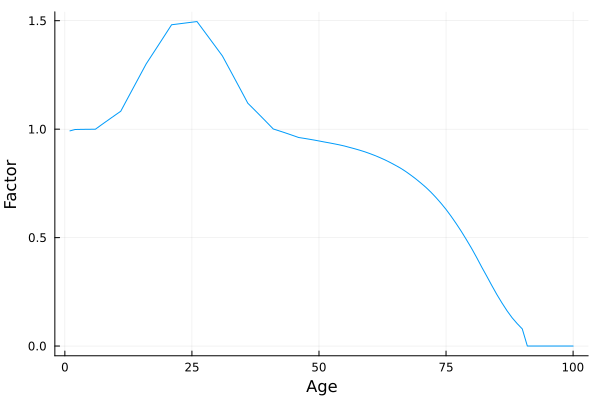

In [16]:
D = population_data();
birth = D["birth_rate"];
death = D["death_rate"];
# Dynamics matrix for populaion dynamics
A = [birth'; diagonal(1 .- death[1:end-1]) zeros(length(death)-1)];
# Contribution factor to total poulation in 2020
# from each age in 2010
cf = ones(100)'*(A^10); # Contribution factor
using Plots
plot(cf', legend = false, xlabel = "Age", ylabel = "Factor")

**Figure 10.1** Contribution factor per age in $2010$ to the total population in $2020$. The value for age i− 1 is the ith component of the row vector 1TA10.

### 10.4 QR factorization

In Julia, the $QR$ factorization of a matrix $A$ can be found using `qr(A)`, which
returns a tuple with the $Q$ and $R$ factors. However the matrix $Q$ is not returned as an array, but in a special compact format. It can be converted to a regular matrix
variable using the command `Matrix(Q)`. Hence, the `QR` factorization as defined in
VMLS is computed by a sequence of two commands:

```julia
Q,R = qr(A)
Q = Matrix(Q)
```

The following example also illustates a second, but minor difference with the
VMLS definition. The $R$ factor computed by Julia may have negative elements on
the diagonal, as opposed to only positive elements if we follow the definition used
in VMLS. The two definitions are equivalent, because if $R_{ii}$ is negative, one can
change the sign of the ith row of R and the ith column of $Q$, to get an equivalent
factorization with $R_{ii} > 0$. However this step is not needed in practice, since
negative elements on the diagonal do not pose any problem in applications of the
$QR$ factorization.

In [17]:
A = randn(6,4);
Q, R = qr(A);
R

4×4 Matrix{Float64}:
 1.8133  0.293731   0.991008  -0.476016
 0.0     1.39149   -1.84488    1.37847
 0.0     0.0       -0.621614  -2.54939
 0.0     0.0        0.0       -1.89053

In [18]:
Q = Matrix(Q)

6×4 Matrix{Float64}:
 -0.749338    0.101943   -0.441243    0.335487
 -0.403518   -0.191517    0.839491    0.15281
  0.271467   -0.567169   -0.123162    0.755841
  0.293344    0.0684399  -0.142312   -0.0111915
 -0.335655   -0.500512   -0.253366   -0.394159
 -0.0570731   0.613231    0.0307105   0.370561

In [19]:
norm(Q*R-A)

2.1944903339819665e-15

In [20]:
Q'*Q

4×4 Matrix{Float64}:
  1.0          -9.5818e-17   1.00195e-16   3.76755e-17
 -9.5818e-17    1.0          2.08924e-16  -2.34846e-16
  1.00195e-16   2.08924e-16  1.0           1.10593e-16
  3.76755e-17  -2.34846e-16  1.10593e-16   1.0